<a href="https://colab.research.google.com/github/PRAN20/Digit-Recognizer-Kaggle/blob/main/Digit_Recognizer_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Digit Recognizer**

## **Importing Header Files**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
%matplotlib inline

# **Importing DataBase From File**

In [3]:
!unzip "/content/drive/MyDrive/digit-recognizer.zip" -d "dg"

Archive:  /content/drive/MyDrive/digit-recognizer.zip
  inflating: dg/sample_submission.csv  
  inflating: dg/test.csv             
  inflating: dg/train.csv            


# **Initialising the Database**

In [4]:
train = pd.read_csv("/content/dg/train.csv")
test = pd.read_csv("/content/dg/test.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Checking Lables**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


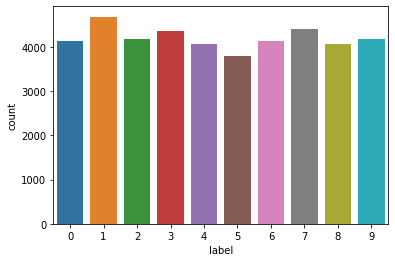

In [5]:
sns.countplot(train['label'])

# **Declaring Variables**

In [6]:
x_train = (train.iloc[:,1:].values).astype('float32') # all pixels
y_train = train.iloc[:,0].values.astype('int32') # all labels
x_test = test.values.astype('float32') # all pixels

# **Plotting the Numbers**

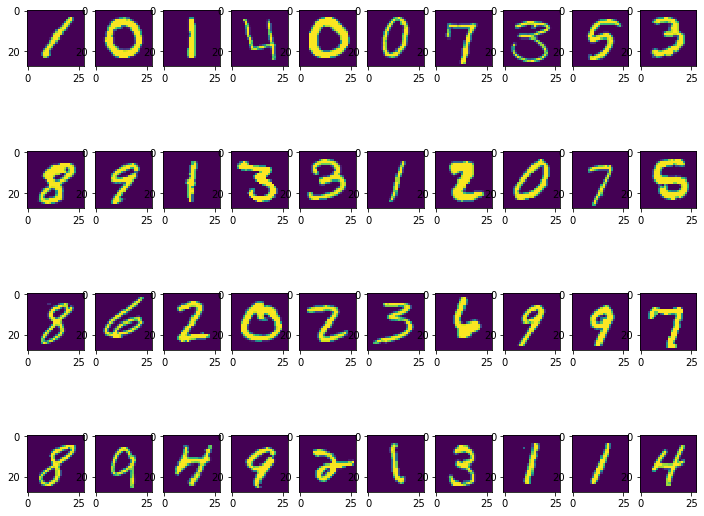

In [7]:
%matplotlib inline
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [8]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

42000 train samples
28000 test samples


# **Reshaping Values**

In [9]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# **Splitting DataBase into Train and Test**

In [10]:
from keras.utils import np_utils
y_train = keras.utils.np_utils.to_categorical(y_train, 10)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42)

In [11]:
batch_size = 64
epochs = 20
input_shape = (28, 28, 1)

# **Training NN Model**

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=15, 
        zoom_range = 0.1,
        width_shift_range=0.1, 
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False) 

# **Training Model**

In [15]:
datagen.fit(X_train)
model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                    epochs = epochs, validation_data = (X_val,Y_val),
                    verbose = 1, 
                    steps_per_epoch = X_train.shape[0] // batch_size
                   )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
590/590 [==============================] - 147s 246ms/step - loss: 0.4597 - accuracy: 0.8530 - val_loss: 0.0584 - val_accuracy: 0.9812
Epoch 2/20
590/590 [==============================] - 140s 238ms/step - loss: 0.1170 - accuracy: 0.9630 - val_loss: 0.0488 - val_accuracy: 0.9836
Epoch 3/20
590/590 [==============================] - 141s 238ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.0380 - val_accuracy: 0.9888
Epoch 4/20
590/590 [==============================] - 141s 238ms/step - loss: 0.0747 - accuracy: 0.9762 - val_loss: 0.0286 - val_accuracy: 0.9905
Epoch 5/20
590/590 [==============================] - 141s 238ms/step - loss: 0.0638 - accuracy: 0.9801 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 6/20
590/590 [==============================] - 141s 240ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 0.0220 - val_accuracy: 0.9936
Epoch 7/20
590/590 [==============================] - 141s 238ms/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0286 -

In [17]:
predictions = model.predict(X_test)
results = np.argmax(predictions, axis = 1)

In [18]:
submissions = pd.read_csv("/content/dg/sample_submission.csv")
submissions['Label'] = results
submissions.to_csv('submission.csv', index = False)